<a href="https://colab.research.google.com/github/pmgumble/Bootstrap-5-Tutorial-Portfolio/blob/master/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Exploratory Data Analysis on dataset Global Terrorism

Objective
Terrorism is a threat of violence that creates fear in a population. It is also important to understand that all violent acts are not terrorist acts.

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

TABLE OF CONTENTS:
1. What this data set is all about?
2. Installation of libraries and dataset
3. Basic Analysis
4. Motive behind activities related to terrorism
5. Number of terrorist activities occured in region with respect to year
6. Number of terrorist activities vs Year
7. Who are the main targets?
8. Hot zones of terrorism by country and city
9. What are the attacking methods used?
10. Attacks vs Killed
11. Most Notorious Groups
12. Activity of Top Terrorist Groups
13. Conclusion

1. What this data set is all about?
Consists Information on more than 180,000 Terrorist Attacks.

Includes information on terrorist attacks around the world from 1970 to 2017.

Includes systematic data on domestic as well as international terrorist incidents that have occurred during specific time period.

2. Installation of libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path = "/content/drive/My Drive/Colab Notebooks/Capstone_Project/EDA/Global_Terrorisam_Analysis/GlobalTerrorismData.csv"
df=pd.read_csv(path, encoding='ISO-8859-1')

In [14]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
# NUmber of rows and columns in data set
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [18]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [16]:
# Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [17]:
# Statistical analysis
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.shape


(181691, 135)

3. Data preperation and Cleaning

In [20]:
# Checking th null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [21]:
#Finding null values
Total_Number = df.isna().sum().sort_values(ascending = False)
Percentage =  ((df.isna().sum()/ df.isna().count())*100).sort_values(ascending=False)
Data_missing = pd.concat([Total_Number,Percentage],axis = 1, keys=['Total','Percentage'])
Data_missing.head(3)


,Total,Percentage
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473


Since most of the columns contain Null Values , selecting only those columns which will be useful in our Data exploration Journey

In [22]:
#Selecting significant columns
features = ['iyear','imonth','iday', 'extended','country_txt','region_txt','city',
      'latitude','longitude','success','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','natlty1_txt', 'gname', 
      'weaptype1_txt','nkill','motive']

data = df[features]

In [27]:
#Renaming the columns for better interpretability 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                         'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                         'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [28]:
#altering the values for better visualizations
data['country'] = data.country.apply(lambda x: 'Congo' if x== 'Democratic Republic of the Congo' else x)
data['country'] = data.country.apply(lambda x: 'UK' if x== 'United Kingdom' else x)
data['country'] = data.country.apply(lambda x: 'USA' if x== 'United States' else x)
data['weapon_used'] = data['weapon_used'].apply(lambda x: 'Vehicle(No Car Bombs)' if 'Vehicle' in x else x)
data['terror_grp'] = data['terror_grp'].apply(lambda x: x.split("(")[1] if "(" in x else x)
data['terror_grp'] = data['terror_grp'].apply(lambda x: x.split(")")[0] if ")" in x else x)

In [30]:
#Sorting Columns needed for the analysis form the dataframe
Terror=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
                   'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [34]:
# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualty
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,0.0


In [32]:
#Checking for null values
data.isnull().sum()

Year                       0
Month                      0
day                        0
over24hrs                  0
country                    0
region                     0
city                     434
latitude                4556
longitude               4557
success                    0
suicide_attack             0
attacktype                 0
target_type                0
target                   636
target_nationality      1559
terror_grp                 0
weapon_used                0
total_killed           10313
motive                131130
dtype: int64

In [33]:
data.columns


Index(['Year', 'Month', 'day', 'over24hrs', 'country', 'region', 'city',
       'latitude', 'longitude', 'success', 'suicide_attack', 'attacktype',
       'target_type', 'target', 'target_nationality', 'terror_grp',
       'weapon_used', 'total_killed', 'motive'],
      dtype='object')

In [35]:
#missing data in the selected columns
total = data.isnull().sum().sort_values(ascending=False)
percent = round(((data.isnull().sum()/data.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
motive,131130,72.17
total_killed,10313,5.68
longitude,4557,2.51
latitude,4556,2.51
target_nationality,1559,0.86
target,636,0.35
city,434,0.24
attacktype,0,0.00
weapon_used,0,0.00
terror_grp,0,0.00


In [37]:
# Filling the null values 
data['city'].fillna('Unknown',inplace =True)

data['target'].fillna('Unknown',inplace =True)

data['total_killed'].fillna(0,inplace =True)

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   day                 181691 non-null  int64  
 3   over24hrs           181691 non-null  int64  
 4   country             181691 non-null  object 
 5   region              181691 non-null  object 
 6   city                181691 non-null  object 
 7   latitude            177135 non-null  float64
 8   longitude           177134 non-null  float64
 9   success             181691 non-null  int64  
 10  suicide_attack      181691 non-null  int64  
 11  attacktype          181691 non-null  object 
 12  target_type         181691 non-null  object 
 13  target              181691 non-null  object 
 14  target_nationality  180132 non-null  object 
 15  terror_grp          181691 non-nul

3. Basic Analysis by using visulisation

In [39]:
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

As we can see from above, the Data for the Year 1993 is not present for some unknown reason

In [40]:
# renaming labels from numerics to string for proper naming convention
data['success'] = data['success'].map({0:'Unsuccessful attempt', 1:'Successful attempt'} )

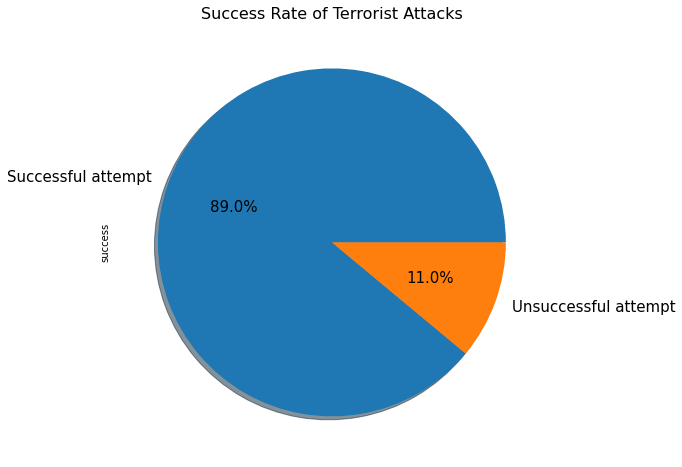

In [42]:
# Plotting the success percentage of all the attacks happened 
plt.figure(figsize=(8,8))
data['success'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=15)
plt.title('Success Rate of Terrorist Attacks',fontsize = 16)
plt.show()